#### This project show how to perform a classification task with TensorFlow

###### Also focus on how o identify and deal with overfitting through Early Stopping Callbacks and Dropout Layers

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import tensorflow
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv(r'C:\Users\farayom2\Desktop\Python Bootcamp-master\22-Deep Learning\DATA\cancer_classification.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


<AxesSubplot:xlabel='benign_0__mal_1', ylabel='count'>

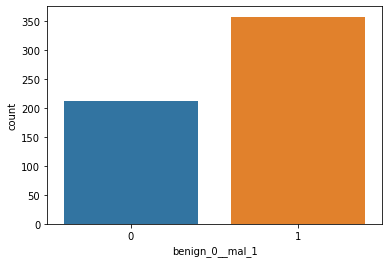

In [6]:
sns.countplot(x='benign_0__mal_1',data=df)

<AxesSubplot:>

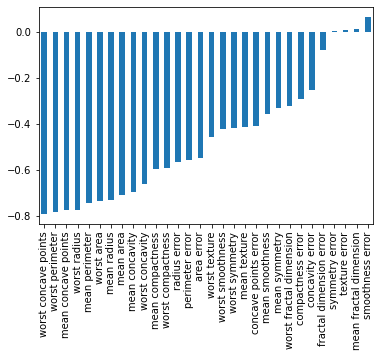

In [11]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

<AxesSubplot:>

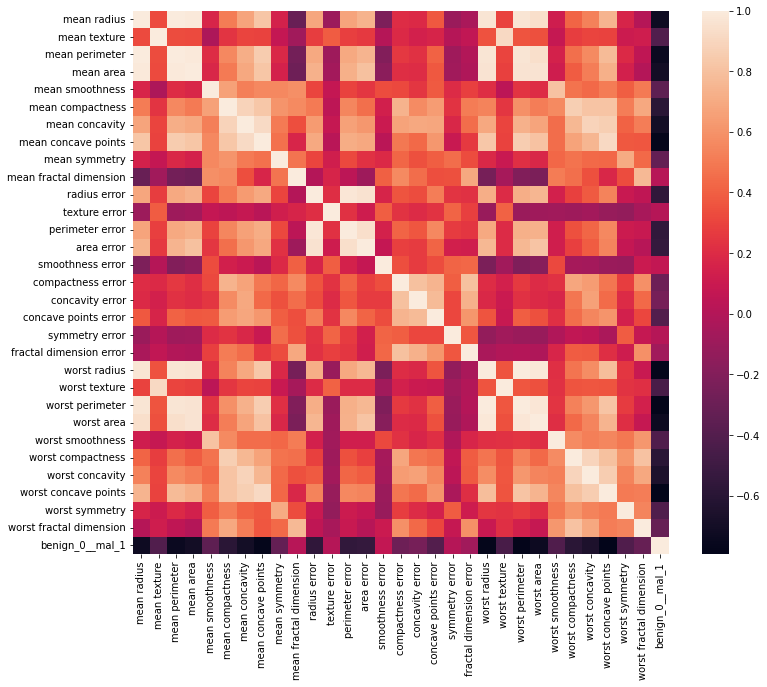

In [14]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr())

#### Train Test Split

In [15]:
X = df.drop('benign_0__mal_1',axis=1).values
y = df['benign_0__mal_1'].values

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)

#### Scaling Data

In [18]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
scaler = MinMaxScaler()

In [20]:
X_train = scaler.fit_transform(X_train)

In [21]:
X_test = scaler.transform(X_test)

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [24]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))

#BINARY CLASSIFICATION
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy')

In [25]:
model.fit(x= X_train, y = y_train, epochs=600, validation_data=(X_test, y_test))

Epoch 1/600
14/14 [==============================] - 1s 15ms/step - loss: 0.6923 - val_loss: 0.6661
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6424 - val_loss: 0.6185
Epoch 3/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5948 - val_loss: 0.5671
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5422 - val_loss: 0.5105
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4854 - val_loss: 0.4540
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4316 - val_loss: 0.4026
Epoch 7/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3880 - val_loss: 0.3597
Epoch 8/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3464 - val_loss: 0.3240
Epoch 9/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3156 - val_loss: 0.2925
Epoch 10/600
14/14 [==============================] - 0s 3ms/step - loss: 0.2882 - val_loss: 0.2667
Epoch 11

14/14 [==============================] - 0s 3ms/step - loss: 0.0530 - val_loss: 0.1291
Epoch 84/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0520 - val_loss: 0.1251
Epoch 85/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0525 - val_loss: 0.1268
Epoch 86/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0561 - val_loss: 0.1276
Epoch 87/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0520 - val_loss: 0.1325
Epoch 88/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0528 - val_loss: 0.1288
Epoch 89/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0547 - val_loss: 0.1298
Epoch 90/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0563 - val_loss: 0.1320
Epoch 91/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0504 - val_loss: 0.1339
Epoch 92/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0498 - val_loss: 0.1240
Epoch 93/600


14/14 [==============================] - 0s 3ms/step - loss: 0.0412 - val_loss: 0.1546
Epoch 165/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0413 - val_loss: 0.1397
Epoch 166/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0411 - val_loss: 0.1409
Epoch 167/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0409 - val_loss: 0.1621
Epoch 168/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0428 - val_loss: 0.1523
Epoch 169/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0401 - val_loss: 0.1554
Epoch 170/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0382 - val_loss: 0.1431
Epoch 171/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.1462
Epoch 172/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0404 - val_loss: 0.1503
Epoch 173/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0408 - val_loss: 0.1452
Epoc

14/14 [==============================] - 0s 3ms/step - loss: 0.0288 - val_loss: 0.1742
Epoch 246/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0285 - val_loss: 0.1719
Epoch 247/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0288 - val_loss: 0.1721
Epoch 248/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0290 - val_loss: 0.1688
Epoch 249/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0298 - val_loss: 0.1738
Epoch 250/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0293 - val_loss: 0.1801
Epoch 251/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0287 - val_loss: 0.1746
Epoch 252/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0286 - val_loss: 0.1662
Epoch 253/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0287 - val_loss: 0.1698
Epoch 254/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0276 - val_loss: 0.1796
Epoc

14/14 [==============================] - 0s 3ms/step - loss: 0.0190 - val_loss: 0.2000
Epoch 327/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0190 - val_loss: 0.1986
Epoch 328/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0185 - val_loss: 0.2023
Epoch 329/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0200 - val_loss: 0.1896
Epoch 330/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0197 - val_loss: 0.2069
Epoch 331/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0200 - val_loss: 0.1974
Epoch 332/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0195 - val_loss: 0.2121
Epoch 333/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0189 - val_loss: 0.1916
Epoch 334/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0189 - val_loss: 0.2158
Epoch 335/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0230 - val_loss: 0.1950
Epoc

14/14 [==============================] - 0s 3ms/step - loss: 0.0145 - val_loss: 0.2352
Epoch 408/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0129 - val_loss: 0.2426
Epoch 409/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0119 - val_loss: 0.2354
Epoch 410/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0119 - val_loss: 0.2361
Epoch 411/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0121 - val_loss: 0.2440
Epoch 412/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0117 - val_loss: 0.2297
Epoch 413/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0116 - val_loss: 0.2379
Epoch 414/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0117 - val_loss: 0.2445
Epoch 415/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0116 - val_loss: 0.2362
Epoch 416/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0118 - val_loss: 0.2280
Epoc

14/14 [==============================] - 0s 3ms/step - loss: 0.0079 - val_loss: 0.2695
Epoch 489/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0073 - val_loss: 0.2715
Epoch 490/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0086 - val_loss: 0.3113
Epoch 491/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0090 - val_loss: 0.2664
Epoch 492/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0101 - val_loss: 0.3287
Epoch 493/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0086 - val_loss: 0.2647
Epoch 494/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0093 - val_loss: 0.2857
Epoch 495/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0082 - val_loss: 0.2919
Epoch 496/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0077 - val_loss: 0.2701
Epoch 497/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0076 - val_loss: 0.2756
Epoc

14/14 [==============================] - 0s 3ms/step - loss: 0.0068 - val_loss: 0.3568
Epoch 570/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0053 - val_loss: 0.3207
Epoch 571/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0051 - val_loss: 0.3269
Epoch 572/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0073 - val_loss: 0.4149
Epoch 573/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0113 - val_loss: 0.3187
Epoch 574/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0044 - val_loss: 0.3378
Epoch 575/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0044 - val_loss: 0.3251
Epoch 576/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0043 - val_loss: 0.3258
Epoch 577/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0044 - val_loss: 0.3524
Epoch 578/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0058 - val_loss: 0.3296
Epoc

In [27]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

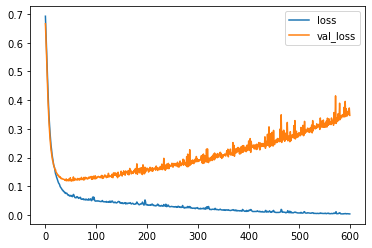

In [30]:
# The increase in validation loss shows that we're overfitting on our training set
losses.plot()

###### EarlyStopping helps to stop training on a much larger epochs value and will further help to stop overfitting

In [31]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))

#BINARY CLASSIFICATION
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy')

In [32]:
from tensorflow.keras.callbacks import EarlyStopping

In [34]:
#help(EarlyStopping)

In [35]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [36]:
model.fit(x= X_train, y = y_train, epochs=600, validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 1s 12ms/step - loss: 0.6885 - val_loss: 0.6679
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6580 - val_loss: 0.6426
Epoch 3/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6313 - val_loss: 0.6130
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5992 - val_loss: 0.5762
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5600 - val_loss: 0.5346
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5187 - val_loss: 0.4922
Epoch 7/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4773 - val_loss: 0.4486
Epoch 8/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4357 - val_loss: 0.4063
Epoch 9/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3975 - val_loss: 0.3667
Epoch 10/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3620 - val_loss: 0.3308
Epoch 11

14/14 [==============================] - 0s 3ms/step - loss: 0.0587 - val_loss: 0.1079
Epoch 84/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0610 - val_loss: 0.1095
Epoch 85/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0580 - val_loss: 0.1163
Epoch 86/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0581 - val_loss: 0.1090
Epoch 87/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0579 - val_loss: 0.1107
Epoch 88/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0572 - val_loss: 0.1123
Epoch 89/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0569 - val_loss: 0.1124
Epoch 89: early stopping


<AxesSubplot:>

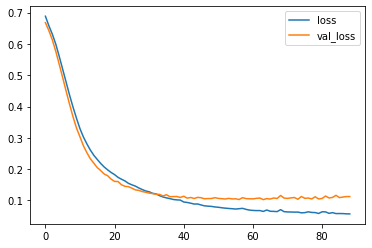

In [37]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

##### Adding dropout layers also help to prevent overfitting

In [38]:
from tensorflow.keras.layers import Dropout

In [49]:
#Fpr Multi-class Classification, we use activation='softmax'

In [42]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(15, activation='relu'))
model.add(Dropout(0.5))

#BINARY CLASSIFICATION
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy')

In [43]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [44]:
model.fit(x= X_train, y = y_train, epochs=600, validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 1s 12ms/step - loss: 0.7142 - val_loss: 0.6965
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6967 - val_loss: 0.6854
Epoch 3/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6821 - val_loss: 0.6728
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6724 - val_loss: 0.6619
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6574 - val_loss: 0.6434
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6403 - val_loss: 0.6186
Epoch 7/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6248 - val_loss: 0.5875
Epoch 8/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6043 - val_loss: 0.5546
Epoch 9/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5571 - val_loss: 0.5199
Epoch 10/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5437 - val_loss: 0.4837
Epoch 11

14/14 [==============================] - 0s 3ms/step - loss: 0.1069 - val_loss: 0.0922
Epoch 84/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0978 - val_loss: 0.0915
Epoch 85/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1219 - val_loss: 0.1027
Epoch 86/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1139 - val_loss: 0.1000
Epoch 87/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0957 - val_loss: 0.0945
Epoch 88/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1200 - val_loss: 0.1033
Epoch 89/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1390 - val_loss: 0.0898
Epoch 90/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0980 - val_loss: 0.0887
Epoch 91/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0937 - val_loss: 0.0985
Epoch 92/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1290 - val_loss: 0.1141
Epoch 93/600


14/14 [==============================] - 0s 3ms/step - loss: 0.0969 - val_loss: 0.0798
Epoch 165/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0747 - val_loss: 0.0844
Epoch 166/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0889 - val_loss: 0.0859
Epoch 167/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0747 - val_loss: 0.0882
Epoch 168/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0867 - val_loss: 0.0770
Epoch 169/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0764 - val_loss: 0.0848
Epoch 170/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0893 - val_loss: 0.0912
Epoch 171/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0856 - val_loss: 0.0800
Epoch 172/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0884 - val_loss: 0.0885
Epoch 172: early stopping


<AxesSubplot:>

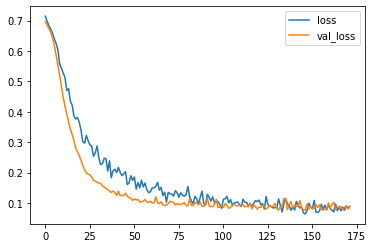

In [45]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

##### TensorFlow predictions code
Multi-class Classification
predictions = np.argmax(model.predict(x_test), axis=-1)

Binary Classification
predictions = (model.predict(x_test) > 0.5).astype("int32")

In [47]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

5/5 [==============================] - 0s 989us/step


In [48]:
predictions

array([[1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
    

In [50]:
from sklearn.metrics import classification_report, confusion_matrix

In [51]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        55
           1       0.99      0.97      0.98        88

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



In [52]:
print(confusion_matrix(y_test,predictions))

[[54  1]
 [ 3 85]]


In [53]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(15, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(6, activation='relu'))

#BINARY CLASSIFICATION
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy')

In [54]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [55]:
model.fit(x= X_train, y = y_train, epochs=600, validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 1s 13ms/step - loss: 0.7021 - val_loss: 0.6781
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 0.7085 - val_loss: 0.6727
Epoch 3/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6837 - val_loss: 0.6664
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6662 - val_loss: 0.6572
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6834 - val_loss: 0.6456
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6600 - val_loss: 0.6300
Epoch 7/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6415 - val_loss: 0.6132
Epoch 8/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6315 - val_loss: 0.5938
Epoch 9/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6280 - val_loss: 0.5800
Epoch 10/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6246 - val_loss: 0.5630
Epoch 11

14/14 [==============================] - 0s 3ms/step - loss: 0.1706 - val_loss: 0.0827
Epoch 84/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1370 - val_loss: 0.0884
Epoch 85/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1106 - val_loss: 0.0854
Epoch 86/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1393 - val_loss: 0.1067
Epoch 87/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1343 - val_loss: 0.0855
Epoch 88/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1283 - val_loss: 0.1097
Epoch 89/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1309 - val_loss: 0.1233
Epoch 90/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1370 - val_loss: 0.0784
Epoch 91/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1437 - val_loss: 0.0843
Epoch 92/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1166 - val_loss: 0.0972
Epoch 93/600


<AxesSubplot:>

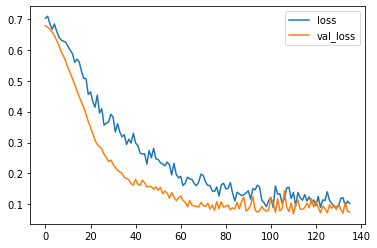

In [56]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [57]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

5/5 [==============================] - 0s 1ms/step


In [58]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        55
           1       0.99      0.98      0.98        88

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [59]:
print(confusion_matrix(y_test,predictions))

[[54  1]
 [ 2 86]]
